<a href="https://colab.research.google.com/github/elianreis06/PROJETO-FINAL-ADA-VISUALIZA-O-DE-GRAFICOS/blob/main/Relat%C3%B3rio_de_an%C3%A1lise_I_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de análise - Desempenho de alunos em provas avaliativas'


In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (6,3))

In [3]:
df = pd.read_csv('exams.csv')

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [4]:
# Conferindo se há valores nulos
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df=df.rename(columns={
    "race/ethnicity":"race_ethnicity",
    "parental level of education":"Education",
    "test preparation course":"test_preparation_course",
    "math score":"math_score",
    "reading score":"reading_score",
    "writing score":"writing_score"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   race_ethnicity           1000 non-null   object
 2   Education                1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test_preparation_course  1000 non-null   object
 5   math_score               1000 non-null   int64 
 6   reading_score            1000 non-null   int64 
 7   writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df['Education'].value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64

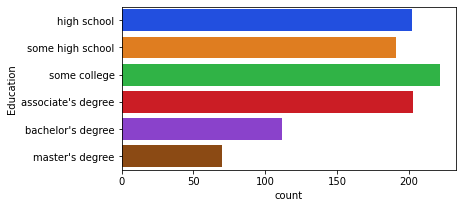

In [8]:
# Utilizando o seaborn
sns.countplot(data=df, y="Education", palette='bright')
plt.show()

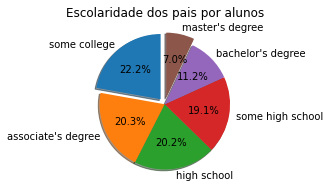

In [9]:
# utilizando o matplotib
labels = df["Education"].value_counts().index
sizes = df["Education"].value_counts()

fig1, ax1 = plt.subplots()

explode = (0.1,0,0,0,0,0.1)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
ax1.set_title('Escolaridade dos pais por alunos')
plt.show()

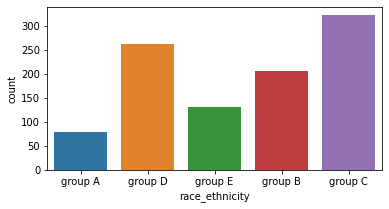

In [10]:
sns.countplot(data=df,x="race_ethnicity")
plt.show()

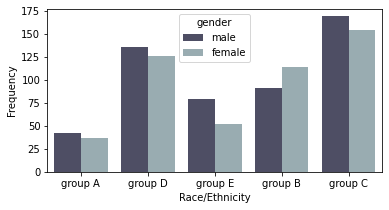

In [11]:
sns.countplot(x=df["race_ethnicity"], hue=df["gender"], palette="bone")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Frequency")
plt.show()

## Conferindo o desempenho dos alunos por escolaridade dos pais

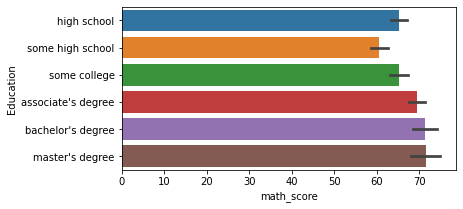

In [12]:
sns.barplot(data=df, x="math_score", y="Education")
plt.show()

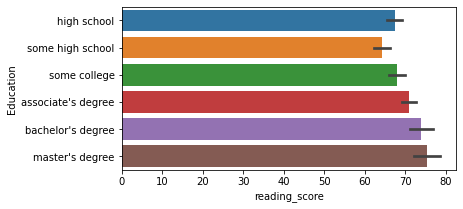

In [13]:
sns.barplot(data=df, x="reading_score", y="Education")
plt.show()

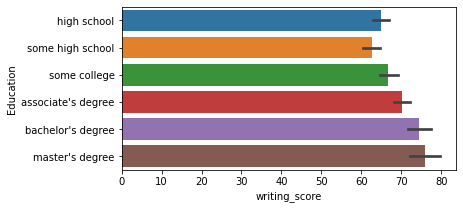

In [14]:
sns.barplot(data=df, x="writing_score", y="Education")
plt.show()

In [15]:
grupo_escolaridade = df.groupby('Education')

In [16]:
grupo_escolaridade.groups

{'associate's degree': [4, 12, 15, 17, 18, 20, 21, 33, 39, 46, 49, 52, 57, 70, 71, 78, 82, 84, 96, 99, 108, 115, 117, 124, 126, 129, 130, 133, 137, 140, 143, 149, 152, 154, 157, 158, 160, 161, 183, 184, 193, 198, 200, 201, 204, 209, 211, 216, 219, 221, 229, 235, 238, 241, 248, 249, 253, 259, 263, 266, 267, 277, 281, 285, 290, 310, 312, 314, 315, 323, 326, 329, 335, 338, 342, 347, 355, 365, 366, 383, 388, 396, 397, 401, 405, 407, 423, 427, 428, 432, 434, 438, 439, 454, 472, 479, 486, 499, 501, 502, ...], 'bachelor's degree': [6, 31, 34, 35, 45, 56, 63, 80, 93, 105, 107, 113, 118, 121, 122, 142, 148, 153, 162, 164, 165, 166, 176, 182, 194, 196, 215, 224, 227, 234, 236, 239, 256, 284, 294, 297, 304, 308, 309, 331, 352, 353, 357, 372, 374, 378, 389, 398, 411, 420, 430, 431, 444, 463, 467, 477, 481, 488, 489, 498, 515, 519, 520, 521, 529, 535, 539, 555, 556, 558, 575, 582, 584, 593, 604, 608, 612, 619, 627, 632, 636, 640, 690, 706, 726, 741, 748, 751, 780, 781, 782, 785, 794, 826, 849, 854,

In [17]:
grupo_escolaridade['math_score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
associate's degree,203.0,69.54,14.10,23.0,60.00,70.0,78.00,100.0
bachelor's degree,112.0,71.49,15.54,35.0,59.75,71.0,84.00,100.0
high school,202.0,65.21,13.99,29.0,55.00,66.0,75.00,100.0
master's degree,70.0,71.59,14.83,38.0,60.25,71.0,83.75,100.0
some college,222.0,65.30,16.08,13.0,55.00,66.0,77.00,100.0
some high school,191.0,60.70,15.37,25.0,50.00,60.0,71.00,97.0


In [18]:
grupo_escolaridade['reading_score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
associate's degree,203.0,70.99,13.52,34.0,62.0,72.0,80.00,100.0
bachelor's degree,112.0,74.01,14.62,34.0,64.0,73.5,87.00,100.0
high school,202.0,67.40,13.88,28.0,59.0,68.0,77.00,100.0
master's degree,70.0,75.43,14.94,40.0,64.0,76.5,85.50,100.0
some college,222.0,68.05,15.48,27.0,58.0,69.0,78.75,100.0
some high school,191.0,64.41,14.14,31.0,54.5,64.0,74.00,100.0


In [19]:
grupo_escolaridade['writing_score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
associate's degree,203.0,70.11,14.07,36.0,60.0,70.0,79.50,100.0
bachelor's degree,112.0,74.41,15.30,33.0,63.0,74.0,86.25,100.0
high school,202.0,64.85,14.57,23.0,57.0,65.0,74.00,97.0
master's degree,70.0,75.89,16.17,41.0,65.0,77.0,87.00,100.0
some college,222.0,66.73,15.98,23.0,56.0,69.0,79.00,100.0
some high school,191.0,62.54,14.91,27.0,50.5,62.0,73.00,97.0


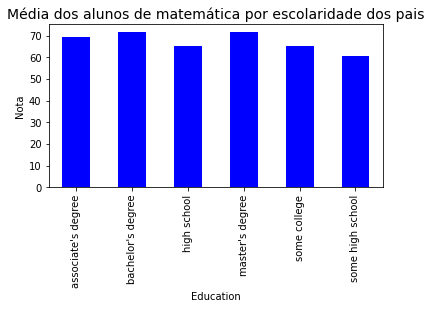

In [20]:
# Utilizando o pandas
fig = grupo_escolaridade['math_score'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Nota')
fig.set_title('Média dos alunos de matemática por escolaridade dos pais', {'fontsize': 14})
plt.show()

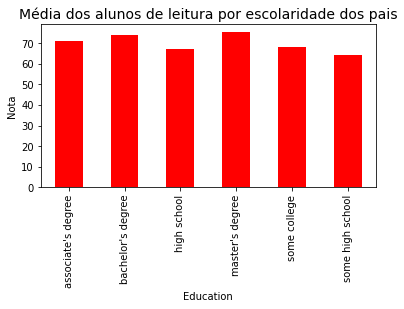

In [21]:
# Utilizando o pandas
fig = grupo_escolaridade['reading_score'].mean().plot.bar(color = 'red')
fig.set_ylabel('Nota')
fig.set_title('Média dos alunos de leitura por escolaridade dos pais', {'fontsize': 14})
plt.show()

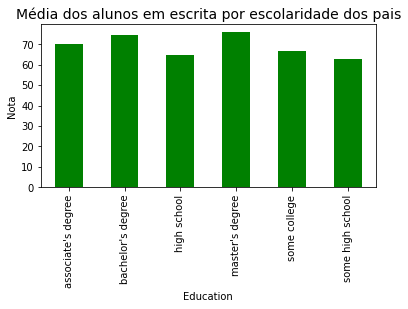

In [22]:
# Utilizando o pandas
fig = grupo_escolaridade['writing_score'].mean().plot.bar(color = 'green')
fig.set_ylabel('Nota')
fig.set_title('Média dos alunos em escrita por escolaridade dos pais', {'fontsize': 14})
plt.show()

## Conferindo quem estudou para a prova

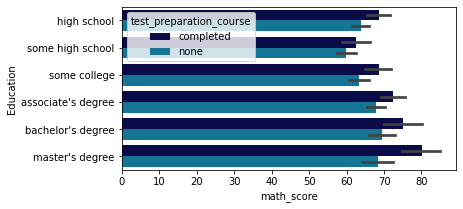

In [23]:
sns.barplot(y = "Education", x = "math_score", data = df, hue = "test_preparation_course", palette='ocean')
plt.show()

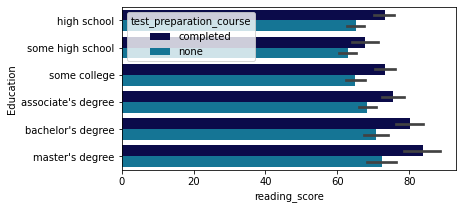

In [24]:
sns.barplot(y = "Education", x = "reading_score", data = df, hue = "test_preparation_course", palette='ocean')
plt.show()

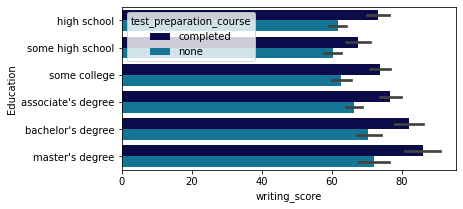

In [25]:
sns.barplot(y = "Education", x = "writing_score", data = df, hue = "test_preparation_course", palette='ocean')
plt.show()

## Conferindo a alimentação

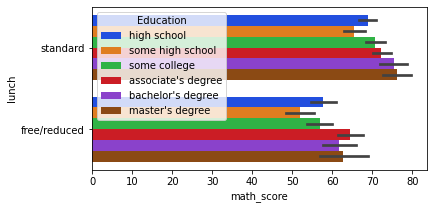

In [26]:
sns.barplot(y = "lunch", x = "math_score", data = df, hue = "Education", palette='bright')
plt.show()

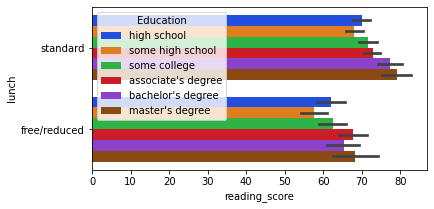

In [27]:
sns.barplot(y = "lunch", x = "reading_score", data = df, hue = "Education", palette='bright')
plt.show()

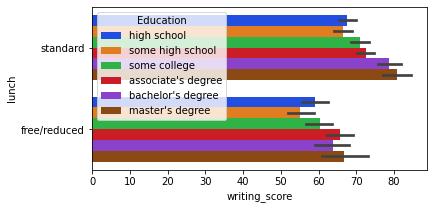

In [28]:
sns.barplot(y = "lunch", x = "writing_score", data = df, hue = "Education", palette='bright')
plt.show()